In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import enzope
from enzope.graphs.graph_class import GTG
import os

In [3]:
figpath = os.path.join(os.getcwd(), 'figs')

In [4]:
posi = {i: [np.random.uniform(0, 1), np.random.uniform(0, 1)] for i in range(100)}

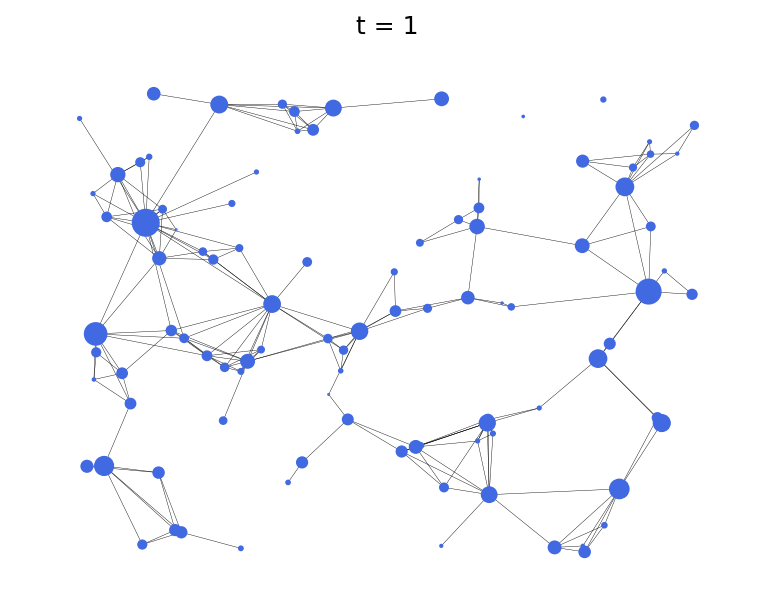

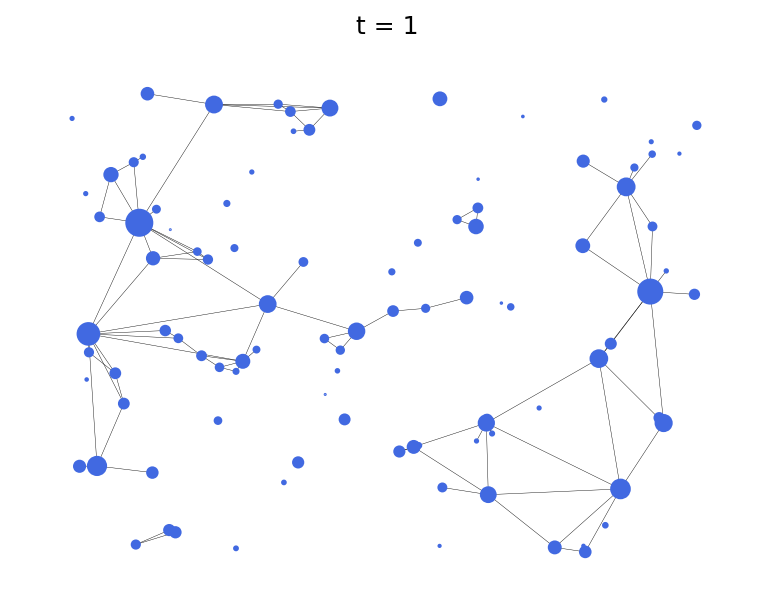

In [4]:
n_nodes = 100
w0 = {i: .5 for i in range(n_nodes)}
g = GTG(n_nodes, theta=100, posi=posi, seed=9, plotable=True)
g2 = GTG(n_nodes, theta=100, posi=posi, join="mul", seed=9, plotable=True)
plot_margin = 0.25

g.plot_snapshot(mcs=1)
g2.plot_snapshot(mcs=1)
# g.fig.savefig(os.path.join(figpath, 'paso3_theta=5e1.png'), dpi=300, transparent=True)

In [13]:
weights = dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m))

(7.48, 12.92012383841579)


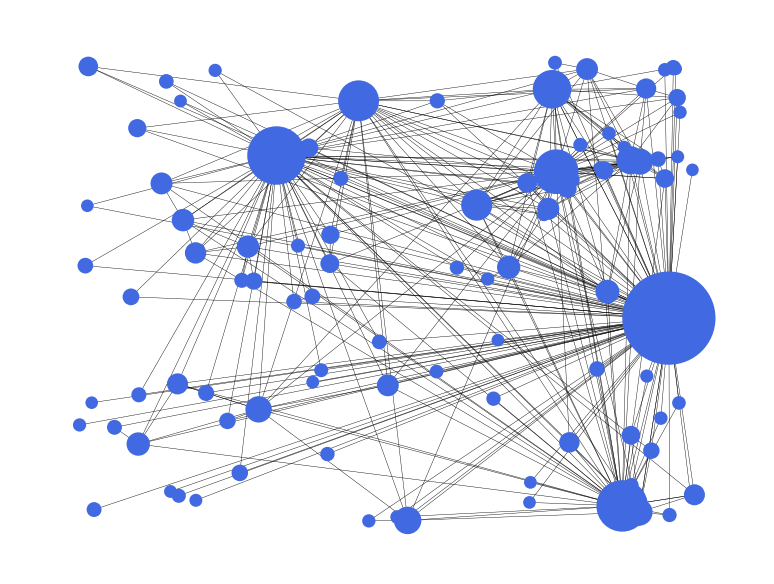

In [20]:
n_nodes = 100
theta = 80
a = 1.5
m = 1
# Par weights
g1 = GTG(n_nodes, theta=theta, w0=weights, posi=posi, seed=23, p_dist=enzope.measures.r1, join='mul', plotable=True)
print(g1.get_mean_degree())
g1.plot_snapshot()
g1.fig.savefig(os.path.join(figpath, 'muestra_mul_par_r1.svg'), transparent=True)